## Mini Project 2 (Customer Feedback Analysis)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict

nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pegu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Cleaning


In [2]:
df_test = pd.read_csv("./sentiment-analysis.csv")
df_test.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [3]:
df = df_test[
    "Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
].str.split(",", expand=True)

df.columns = [
    "Text",
    "Sentiment",
    "Source",
    "Date/Time",
    "User ID",
    "Location",
    "Confidence Score",
]
df

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68
95,"""I had an incredible experience at the theme p...",Positive,Trip Report,2023-07-03 14:40:05,thrillseeker1,Orlando,0.89
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(98, 7)

In [5]:
df.isnull().sum()

Text                2
Sentiment           2
Source              2
Date/Time           2
User ID             2
Location            2
Confidence Score    2
dtype: int64

In [6]:
df = df.dropna()
df.shape

(96, 7)

In [7]:
df.loc[:, "Date/Time"] = df["Date/Time"].str.strip()

df.loc[:, ["Date", "Time"]] = df.loc[:, "Date/Time"].str.split(" ", expand=True)

df.drop(columns=["Date/Time"], inplace=True)

df.head()

C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\2315704464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Date/Time"], inplace=True)


,Text,Sentiment,Source,User ID,Location,Confidence Score,Date,Time
0,"""I love this product!""",Positive,Twitter,@user123,New York,0.85,NaN,NaN
1,"""The service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles,0.65,NaN,NaN
2,"""This movie is amazing!""",Positive,IMDb,moviefan789,London,0.92,NaN,NaN
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,forumuser1,Toronto,0.78,NaN,NaN
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,foodie22,Paris,0.88,NaN,NaN


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text              96 non-null     object        
 1   Sentiment         96 non-null     object        
 2   Source            96 non-null     object        
 3   User ID           96 non-null     object        
 4   Location          96 non-null     object        
 5   Confidence Score  96 non-null     object        
 6   Date              0 non-null      datetime64[ns]
 7   Time              0 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.8+ KB


C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\2189597245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\2189597245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time


### Data Visualization


In [9]:
df.head(5)

,Text,Sentiment,Source,User ID,Location,Confidence Score,Date,Time
0,"""I love this product!""",Positive,Twitter,@user123,New York,0.85,NaT,NaT
1,"""The service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles,0.65,NaT,NaT
2,"""This movie is amazing!""",Positive,IMDb,moviefan789,London,0.92,NaT,NaT
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,forumuser1,Toronto,0.78,NaT,NaT
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,foodie22,Paris,0.88,NaT,NaT


#### Sentiment Distribution


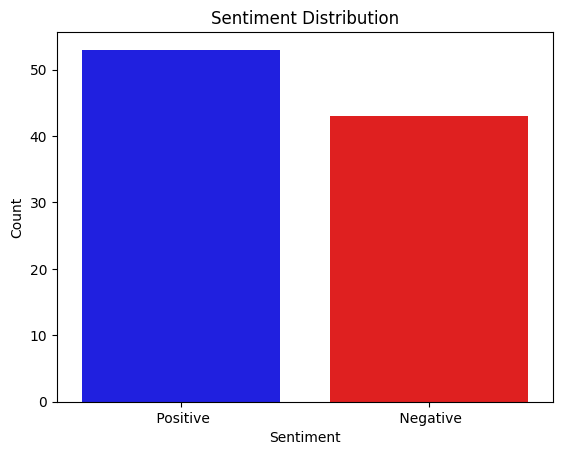

In [10]:
sns.countplot(
    x="Sentiment", data=df, palette=["blue", "red"], legend=False, hue="Sentiment"
)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

#### Positive and Negative Reviews by Source


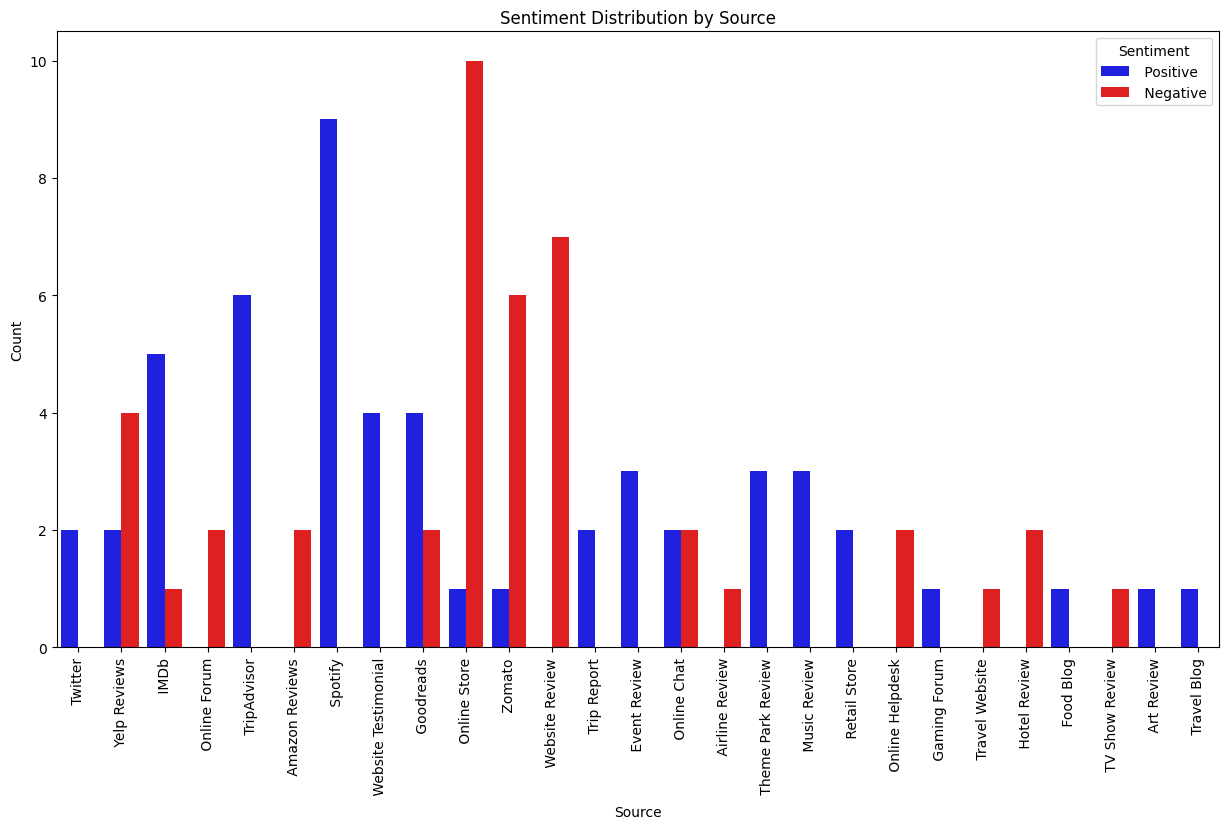

In [11]:
# Sentiment Distribution by Source
plt.figure(figsize=(15, 8))
custom_palette = {"Positive": "blue", "Negative": "red"}
ax = sns.countplot(x="Source", hue="Sentiment", data=df, palette=["blue", "red"])
ax.xaxis.set_tick_params(rotation=90)
plt.title("Sentiment Distribution by Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

#### Positive and Negative Reviews by Location


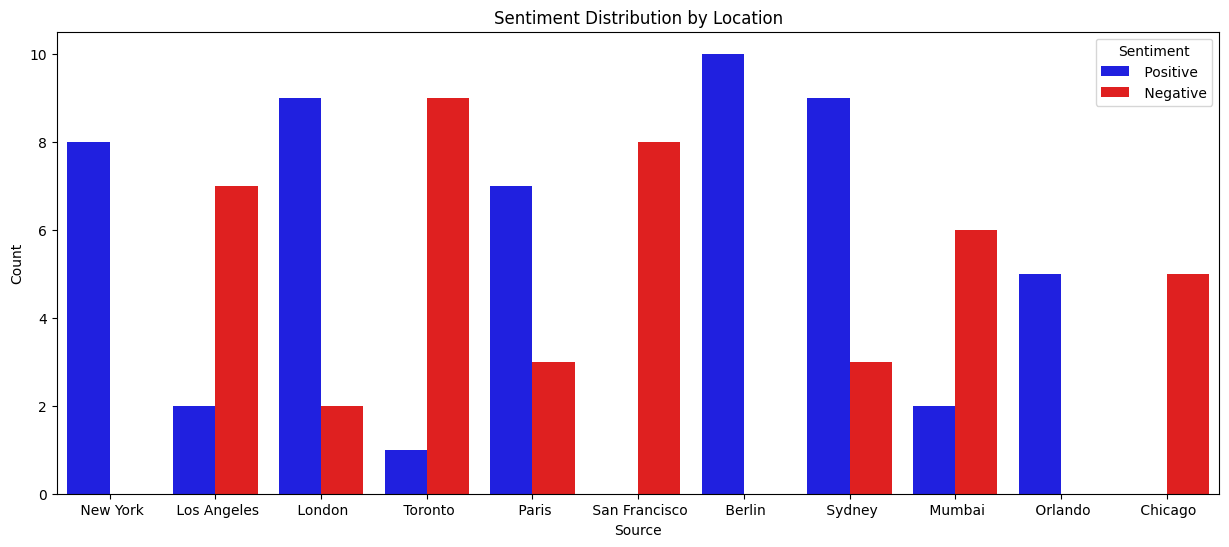

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Location", hue="Sentiment", data=df, palette=["blue", "red"])
plt.title("Sentiment Distribution by Location")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

#### Stopwords and Punctuaction

In [13]:
df.loc[:, "Sentiment"] = df["Sentiment"].str.strip()
df.loc[:, "Sentiment"] = df["Sentiment"].str.lower()

In [14]:
def create_corpus(sentiment):
    corpus = []
    for x in df[df["Sentiment"] == sentiment]["Text"].str.split():
        for i in x:
            corpus.append(i)
    return corpus

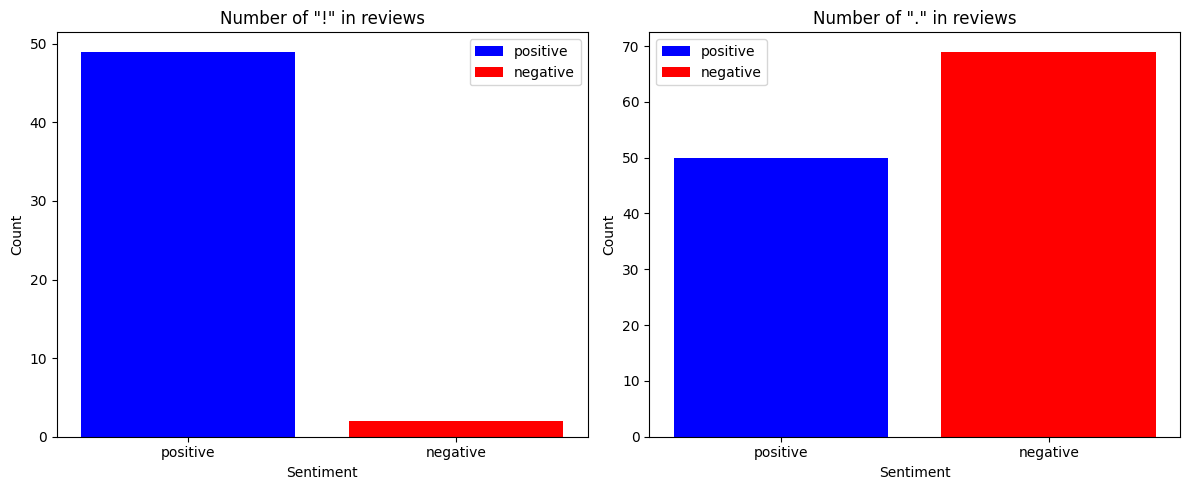

In [15]:
def count_punctuation_marks(sentiment, punctuation):
    count = 0
    for text in df[df["Sentiment"] == sentiment]["Text"]:
        count += text.count(punctuation)
    return count


def plot_punctuation_counts():
    punctuations = ["!", "."]
    sentiments = ["positive", "negative"]
    colors = ["blue", "red"]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for idx, punctuation in enumerate(punctuations):
        for sentiment, color in zip(sentiments, colors):
            count = count_punctuation_marks(sentiment, punctuation)
            axes[idx].bar(sentiment, count, color=color)

        axes[idx].set_xlabel("Sentiment")
        axes[idx].set_ylabel("Count")
        axes[idx].set_title(f'Number of "{punctuation}" in reviews')
        axes[idx].legend(sentiments)

    plt.tight_layout()


plot_punctuation_counts()
plt.show()

> Top 10 most common stopwords

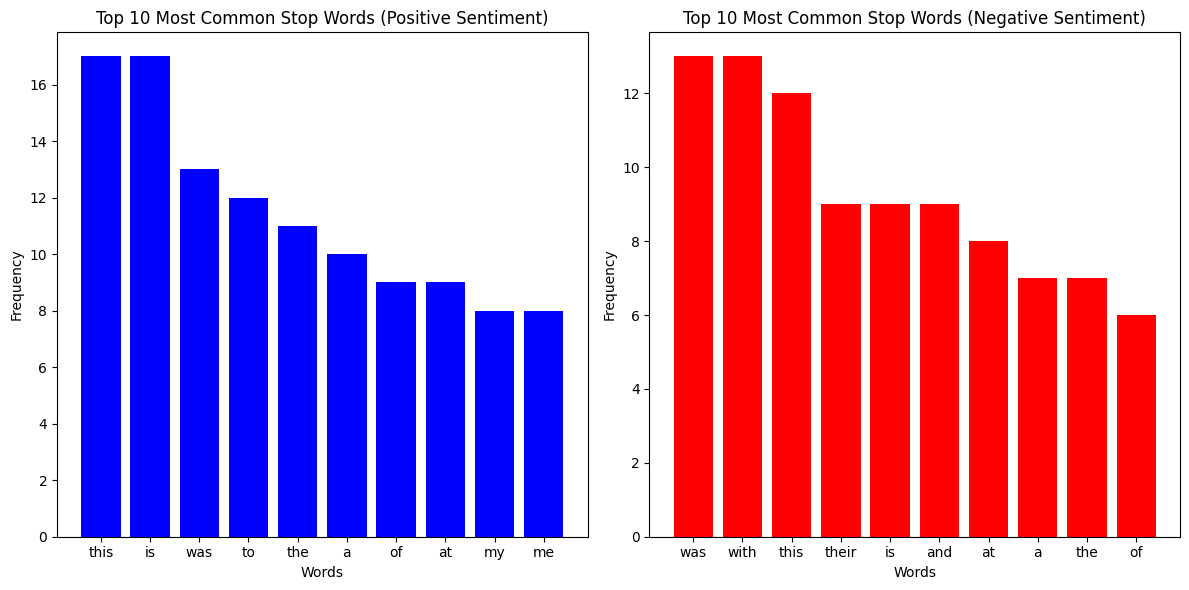

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

corpus_positive = create_corpus("positive")
dic_positive = defaultdict(int)
for word in corpus_positive:
    if word in stop:
        dic_positive[word] += 1
top_positive = sorted(dic_positive.items(), key=lambda x: x[1], reverse=True)[:10]
x_pos, y_pos = zip(*top_positive)
axes[0].bar(x_pos, y_pos, color="blue")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Top 10 Most Common Stop Words (Positive Sentiment)")

corpus_negative = create_corpus("negative")
dic_negative = defaultdict(int)
for word in corpus_negative:
    if word in stop:
        dic_negative[word] += 1
top_negative = sorted(dic_negative.items(), key=lambda x: x[1], reverse=True)[:10]
x_neg, y_neg = zip(*top_negative)
axes[1].bar(x_neg, y_neg, color="red")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Top 10 Most Common Stop Words (Negative Sentiment)")


plt.tight_layout()
plt.show()

#### The Most Common Words


C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\58319178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"] = df["Text"].str.strip('"')
C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\58319178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"] = df["Text"].str.replace(r"[{}]".format(string.punctuation), "")


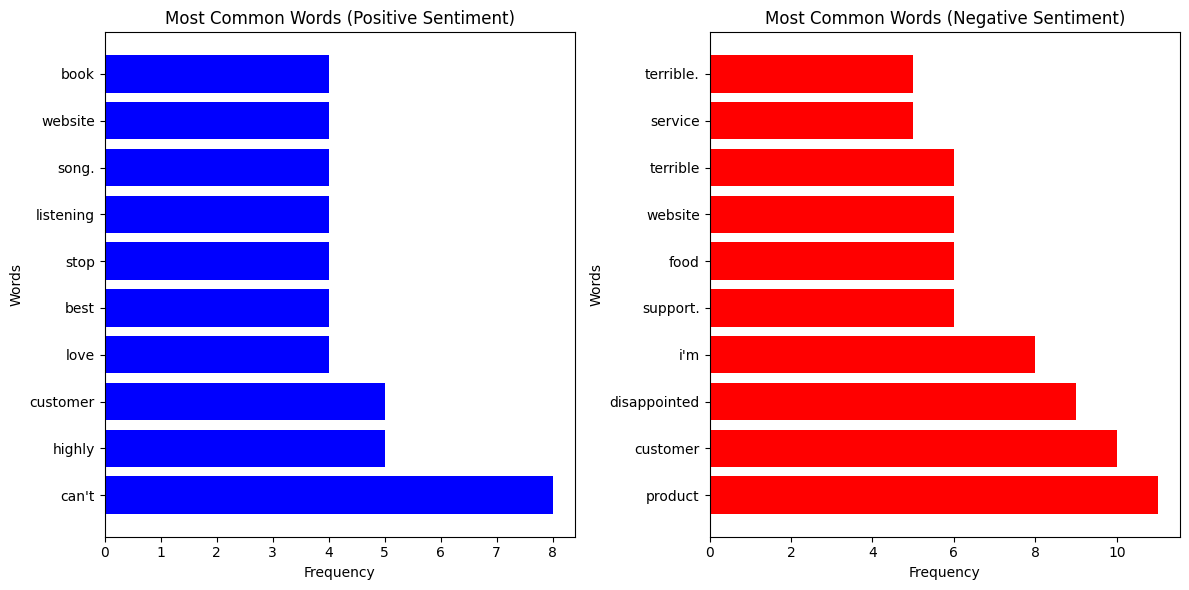

In [17]:
df["Text"] = df["Text"].str.strip('"')


def plot_most_common_words(corpus, sentiment, color):
    df["Text"] = df["Text"].str.replace(r"[{}]".format(string.punctuation), "")
    word_freq = defaultdict(int)
    special_chars = string.punctuation
    for word in corpus:
        word = word.lower()
        if word not in stop and word not in special_chars:
            word_freq[word] += 1

    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top_words)

    plt.barh(x, y, color=color)
    plt.ylabel("Words")
    plt.xlabel("Frequency")
    plt.title(f"Most Common Words ({sentiment.capitalize()} Sentiment)")


corpus_positive = create_corpus("positive")
plt.subplot(1, 2, 1)
plot_most_common_words(corpus_positive, "positive", "blue")

corpus_negative = create_corpus("negative")
plt.subplot(1, 2, 2)
plot_most_common_words(corpus_negative, "negative", "red")
plt.subplots_adjust(wspace=0.5)

plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()

#### Word Cloud


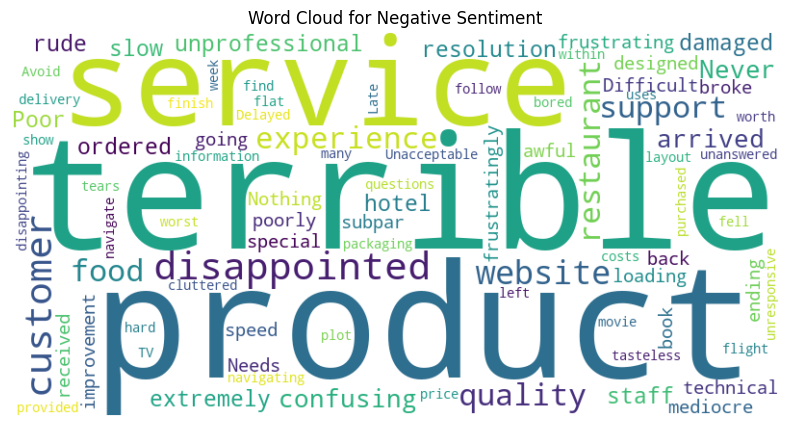

In [18]:
from wordcloud import WordCloud, STOPWORDS


def plot_word_cloud(sentiment):
    corpus = create_corpus(sentiment)
    stopwords = set(STOPWORDS)
    special_chars = set(string.punctuation)
    custom_stopwords = set(["would", "could", "should", "might", "will", "can", "must"])

    all_stopwords = stopwords.union(special_chars).union(custom_stopwords)

    wordcloud = WordCloud(
        width=800, height=400, stopwords=all_stopwords, background_color="white"
    ).generate(" ".join(corpus))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
    plt.show()


plot_word_cloud("negative")

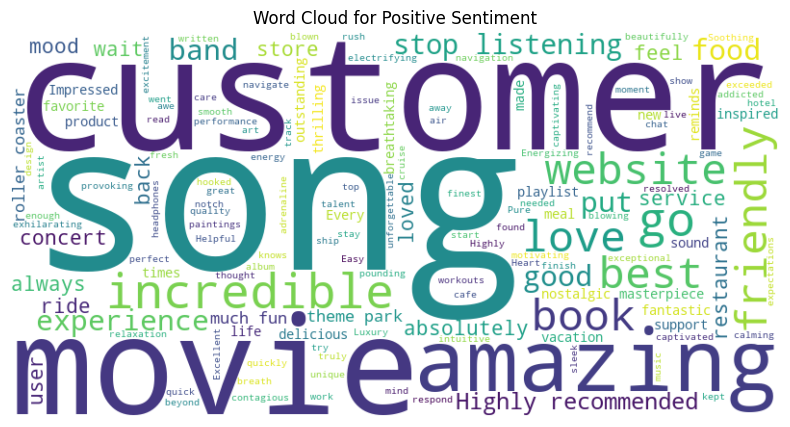

In [19]:
plot_word_cloud("positive")

### Sentiment Analysis using TextBlob

In [20]:
df.head()

,Text,Sentiment,Source,User ID,Location,Confidence Score,Date,Time
0,I love this product!,positive,Twitter,@user123,New York,0.85,NaT,NaT
1,The service was terrible.,negative,Yelp Reviews,user456,Los Angeles,0.65,NaT,NaT
2,This movie is amazing!,positive,IMDb,moviefan789,London,0.92,NaT,NaT
3,I'm so disappointed with their customer support.,negative,Online Forum,forumuser1,Toronto,0.78,NaT,NaT
4,Just had the best meal of my life!,positive,TripAdvisor,foodie22,Paris,0.88,NaT,NaT


In [21]:
# saving all the instances of the column- "Text" in a list
sentences = df["Text"].values.tolist()
print(sentences[0:2])

['I love this product!', 'The service was terrible.']


In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pegu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pegu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    lowercase_tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words("english"))
    cleaned_tokens = [
        token
        for token in lowercase_tokens
        if token not in string.punctuation and token not in stop_words
    ]
    return cleaned_tokens


# Apply preprocessing to each sentence
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]
print(preprocessed_sentences[0:2])

[['love', 'product'], ['service', 'terrible']]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# saving some instances of preprocessed_sentences into sample_sentences to get clear vision on the outputs.
sample_sentences = preprocessed_sentences[0:6]
# Convert preprocessed sentences to text
preprocessed_text = [" ".join(tokens) for tokens in sample_sentences]
# print("Preprocessed text:",preprocessed_text)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_text)
feature_names = vectorizer.get_feature_names_out()
# Convert the sparse matrix to a dense array
X_array = X.toarray()

# Print the feature names and the BoW matrix
print("The output is only on sentences 1 to 6")
print("\nFeature Names:", feature_names)
print("\nBoW Matrix:")
print(X_array)

The output is only on sentences 1 to 6

Feature Names: ['amazing' 'best' 'customer' 'disappointed' 'life' 'love' 'meal' 'movie'
 'product' 'quality' 'service' 'subpar' 'support' 'terrible']

BoW Matrix:
[[0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]]


In [25]:
# Calculate word frequency from the BoW matrix
word_frequency = X_array.sum(axis=0)

# Create a dictionary with word frequencies
word_frequency_dict = dict(zip(feature_names, word_frequency))

# Print the word frequencies
print("The output is only on sentences 1 to 6")
for word, frequency in word_frequency_dict.items():
    print(f"{word}: {frequency}")

The output is only on sentences 1 to 6
amazing: 1
best: 1
customer: 1
disappointed: 1
life: 1
love: 1
meal: 1
movie: 1
product: 2
quality: 1
service: 1
subpar: 1
support: 1
terrible: 1


**Sentiment Analysis using TextBlob**

>This python library has two functions:

**Polarity:** It varies from -1 to +1, Negative tone sentences have polarity from 0 to -1. Positive tone sentences have polarity from 0 to 1. Neutral tone sentences have a polarity of 0.
**Subjectivity:** It varies from 0 to 1 From 0 to 1, the sentences changes from objective (factual) to subjective (opinionated)

In [26]:
from textblob import TextBlob

In [27]:
df.iloc[:, 1].value_counts()
total = len(df.iloc[:, 1])

# Print the total number of values
print("Total number of values in column 'Text':", total)

Total number of values in column 'Text': 96


In [28]:
column = df.iloc[:, 1]
column.tail(2)

94    negative
95    positive
Name: Sentiment, dtype: object

In [29]:
# this code makes two arrays that will contain polarity and subjectivity of the whole dataset
val, pol, sub = [], [], []
for i in range(0, total):
    val.append(i)
    pol.append(i)
    sub.append(i)
    pol[i] = TextBlob(column[i]).sentiment.polarity
    sub[i] = TextBlob(column[i]).sentiment.subjectivity
    if pol[i] == 0:
        val[i] = "Neutral"
    elif pol[i] > 0 and pol[i] <= 1:
        val[i] = "Positive"
    else:
        val[i] = "Negative"

print(val[23])
print(pol[23])

Negative
-0.3


In [30]:
new_column_name = "Calculated Sentiment"
new_column_df = pd.DataFrame({new_column_name: val})

# Append the new column to the existing DataFrame
df.loc[:, new_column_name] = new_column_df.loc[:, new_column_name]

C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\1626045557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = new_column_df.loc[:, new_column_name]


In [31]:
sentiment = df["Sentiment"]
print(sentiment)
calculated = df["Calculated Sentiment"]
print(calculated)

0     positive
1     negative
2     positive
3     negative
4     positive
        ...   
91    positive
92    negative
93    positive
94    negative
95    positive
Name: Sentiment, Length: 96, dtype: object
0     Positive
1     Negative
2     Positive
3     Negative
4     Positive
        ...   
91    Positive
92    Negative
93    Positive
94    Negative
95    Positive
Name: Calculated Sentiment, Length: 96, dtype: object


In [32]:
# Convert the "Calculated Sentiment" column to lowercase
df.loc[:, "Calculated Sentiment"] = df["Calculated Sentiment"].str.lower()

In [33]:
correct = []

# Strip leading whitespace from the sentiment column
sentiment = sentiment.str.lstrip()

# Checking if both the rows are the same
for i in range(0, total):
    correct.append(i)
    if sentiment.iloc[i] == calculated.iloc[i]:
        correct[i] = "Yes"
    else:
        correct[i] = "No"

print(correct[0])

Yes


In [34]:
new_column_name = "Correctly calculated"
new_column_df = pd.DataFrame({new_column_name: correct})

# Append the new column to the existing DataFrame
df.loc[:, new_column_name] = new_column_df[new_column_name]

C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\2029377269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = new_column_df[new_column_name]


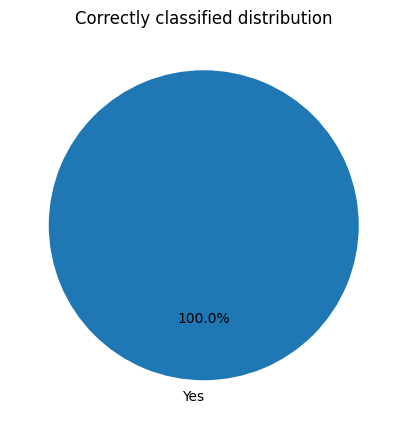

In [35]:
class_counts = df["Correctly calculated"].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 7))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Correctly classified distribution")
plt.show()

### Text Classification

In [36]:
df.head()

,Text,Sentiment,Source,User ID,Location,Confidence Score,Date,Time,Calculated Sentiment,Correctly calculated
0,I love this product!,positive,Twitter,@user123,New York,0.85,NaT,NaT,positive,Yes
1,The service was terrible.,negative,Yelp Reviews,user456,Los Angeles,0.65,NaT,NaT,negative,Yes
2,This movie is amazing!,positive,IMDb,moviefan789,London,0.92,NaT,NaT,positive,Yes
3,I'm so disappointed with their customer support.,negative,Online Forum,forumuser1,Toronto,0.78,NaT,NaT,negative,Yes
4,Just had the best meal of my life!,positive,TripAdvisor,foodie22,Paris,0.88,NaT,NaT,positive,Yes


C:\Users\pegu\AppData\Local\Temp\ipykernel_21656\1562802944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Sentiment Polarity"] = df["Text"].apply(get_sentiment_polarity)


                                               Text Sentiment  \
0                              I love this product!  positive   
1                         The service was terrible.  negative   
2                            This movie is amazing!  positive   
3  I'm so disappointed with their customer support.  negative   
4                Just had the best meal of my life!  positive   

   Sentiment Polarity Calculated Sentiment  
0               0.625             Positive  
1              -1.000             Negative  
2               0.750             Positive  
3              -0.750             Negative  
4               1.000             Positive  
count    96.000000
mean      0.059125
std       0.623907
min      -1.000000
25%      -0.400000
50%       0.050000
75%       0.625000
max       1.000000
Name: Sentiment Polarity, dtype: float64


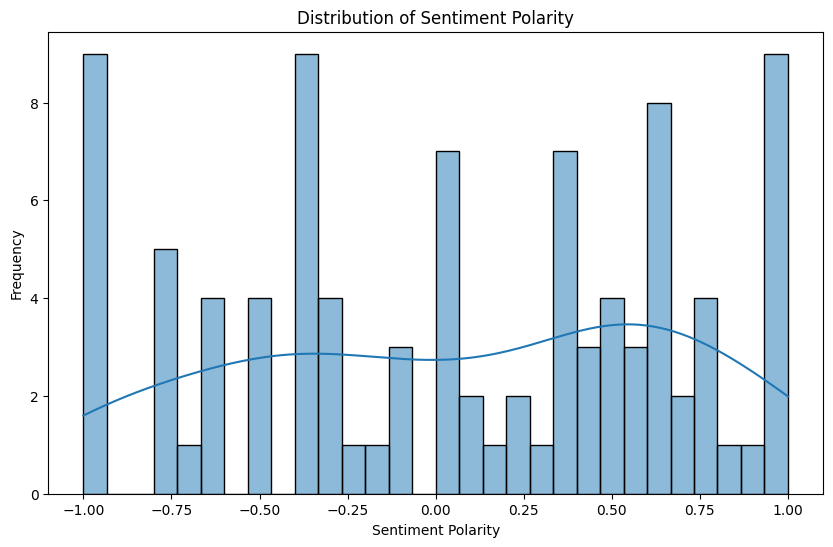

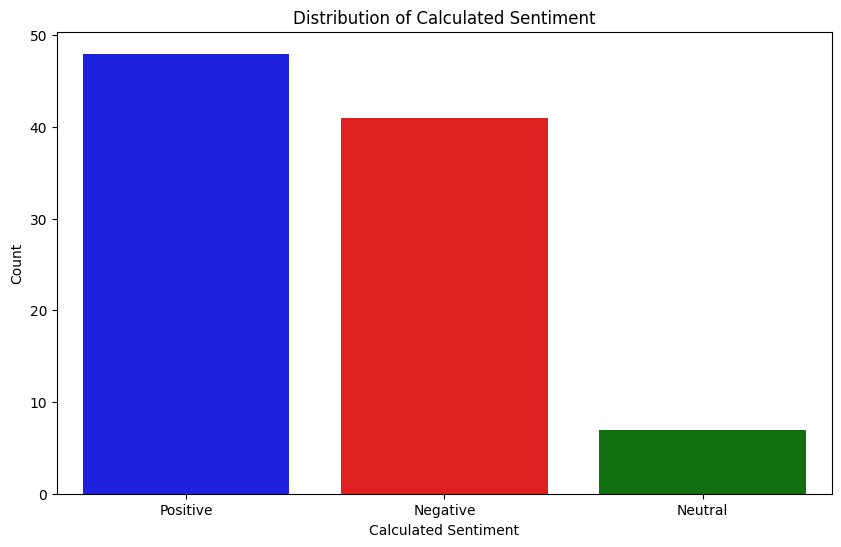

In [37]:
# Define a function to calculate sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


# Apply the function to the "Comments" column
df.loc[:, "Sentiment Polarity"] = df["Text"].apply(get_sentiment_polarity)


# Define a function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


# Apply the classification function to the "Sentiment Polarity" column
df.loc[:, "Calculated Sentiment"] = df["Sentiment Polarity"].apply(classify_sentiment)

# Display the DataFrame with the new columns
print(df[["Text", "Sentiment", "Sentiment Polarity", "Calculated Sentiment"]].head())

# Display basic statistics of the sentiment polarity
print(df["Sentiment Polarity"].describe())

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment Polarity"], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of calculated sentiment
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Calculated Sentiment",
    hue="Calculated Sentiment",
    data=df,
    palette=["blue", "red", "green"],
    legend=False,
)
plt.title("Distribution of Calculated Sentiment")
plt.xlabel("Calculated Sentiment")
plt.ylabel("Count")
plt.show()

In [38]:
# Correlation Analysis
correlation = df[["Confidence Score", "Sentiment Polarity"]].corr()
print("Correlation between Confidence Score and Sentiment Polarity:")
print(correlation)

Correlation between Confidence Score and Sentiment Polarity:
                    Confidence Score  Sentiment Polarity
Confidence Score            1.000000            0.822419
Sentiment Polarity          0.822419            1.000000


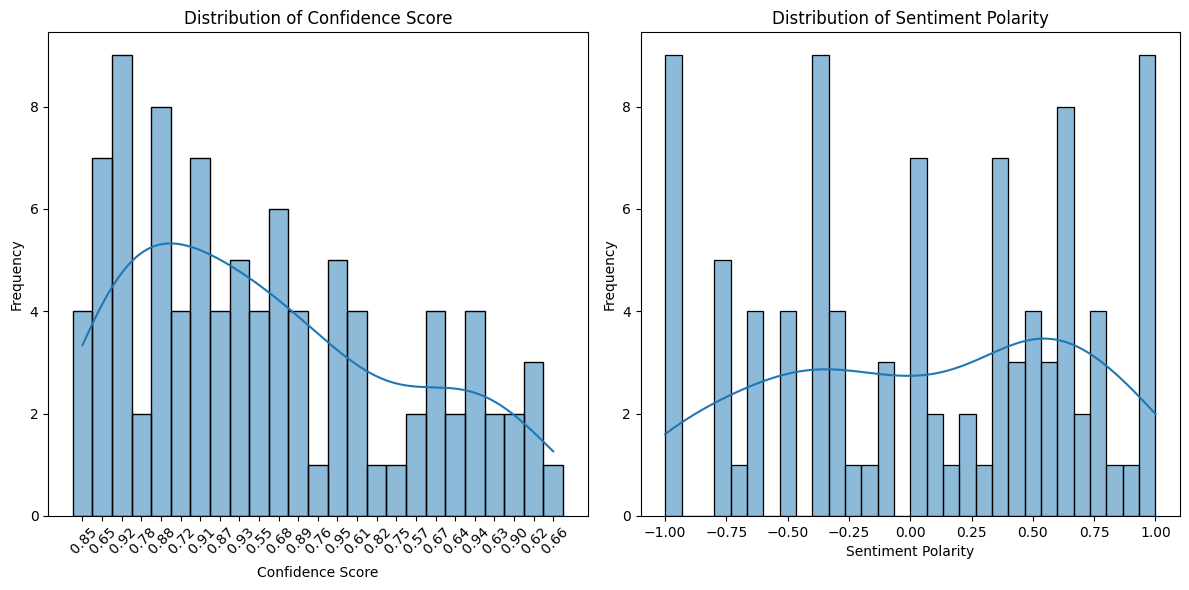

In [39]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Confidence Score"], bins=30, kde=True)
plt.title("Distribution of Confidence Score")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df["Sentiment Polarity"], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

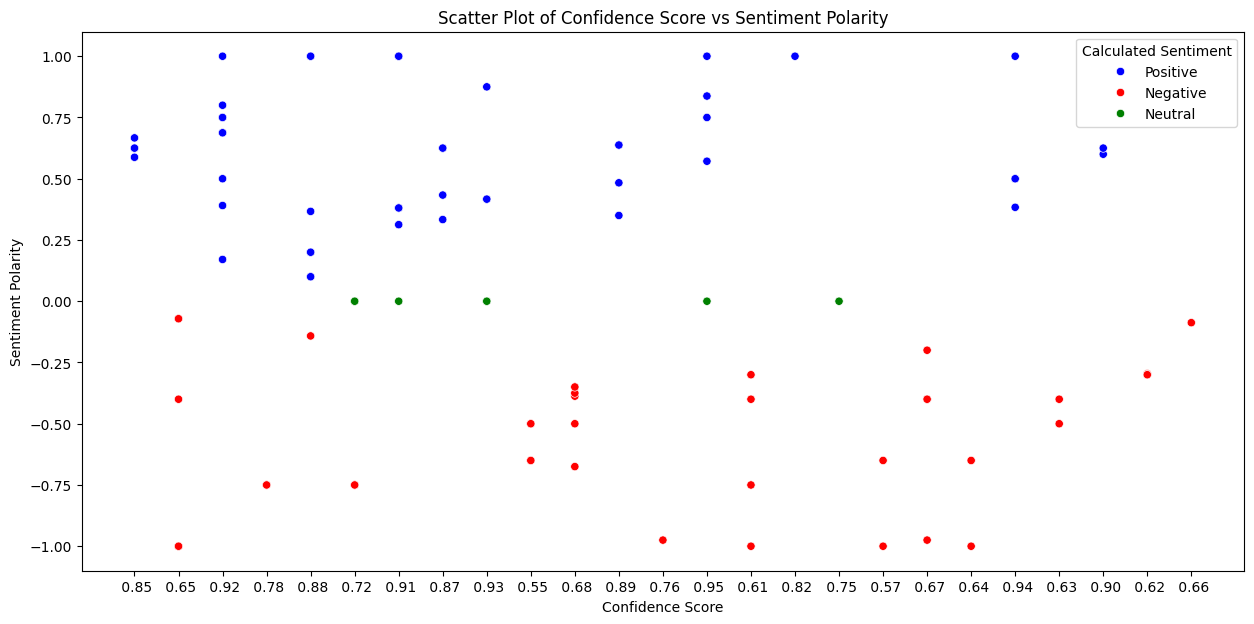

In [40]:
# Scatter Plot Analysis
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x="Confidence Score",
    y="Sentiment Polarity",
    hue="Calculated Sentiment",
    data=df,
    palette=["blue", "red", "green"],
)
plt.title("Scatter Plot of Confidence Score vs Sentiment Polarity")
plt.xlabel("Confidence Score")
plt.ylabel("Sentiment Polarity")
plt.legend(title="Calculated Sentiment")
plt.show()